In [1]:
#Importing all the required libraries
import xarray 
import os
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import imdlib as imd
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.io


In [2]:
df=pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\Rain Category 1901-2010.csv",index_col=0)
df

,zone1,zone2,zone3,zone4,zone5,zone6
0,3,3,4,4,4,4
1,4,4,4,4,3,4
2,4,4,5,4,4,4
3,3,4,3,4,3,3
4,3,4,4,4,3,2
...,...,...,...,...,...,...
105,5,4,4,3,4,5
106,4,4,6,5,4,5
107,4,5,4,4,4,3
108,4,3,4,4,3,4


In [42]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

linkage_matrix = linkage(df, method='ward')  

num_clusters = 9  
cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# plt.figure(figsize=(12, 6))
# dendrogram(linkage_matrix, p=10, truncate_mode='level', labels=cluster_labels)
# plt.title('Hierarchical Clustering Dendrogram with 9 Clusters')
# plt.xlabel('Sample Index')
# plt.ylabel('Distance')
# plt.show()

print("Cluster Labels:", cluster_labels)


Cluster Labels: [3 3 5 1 1 7 7 9 9 5 2 7 7 8 2 9 9 1 7 3 7 6 4 5 6 9 7 3 7 7 4 3 9 7 7 6 7
 5 2 7 3 7 7 9 9 8 5 2 7 7 3 7 6 4 7 9 7 4 8 7 8 9 7 5 2 3 7 2 2 8 6 1 9 3
 9 9 9 7 3 6 4 2 8 3 2 2 1 9 7 7 2 7 7 8 7 5 4 5 2 2 7 1 9 3 4 9 5 6 3 9]


In [31]:
cluster_labels

array([3, 3, 5, 1, 1, 7, 7, 9, 9, 5, 2, 7, 7, 8, 2, 9, 9, 1, 7, 3, 7, 6,
       4, 5, 6, 9, 7, 3, 7, 7, 4, 3, 9, 7, 7, 6, 7, 5, 2, 7, 3, 7, 7, 9,
       9, 8, 5, 2, 7, 7, 3, 7, 6, 4, 7, 9, 7, 4, 8, 7, 8, 9, 7, 5, 2, 3,
       7, 2, 2, 8, 6, 1, 9, 3, 9, 9, 9, 7, 3, 6, 4, 2, 8, 3, 2, 2, 1, 9,
       7, 7, 2, 7, 7, 8, 7, 5, 4, 5, 2, 2, 7, 1, 9, 3, 4, 9, 5, 6, 3, 9],
      dtype=int32)

In [32]:
values=cluster_labels
vals=[i for i in values]
vals


[3,
 3,
 5,
 1,
 1,
 7,
 7,
 9,
 9,
 5,
 2,
 7,
 7,
 8,
 2,
 9,
 9,
 1,
 7,
 3,
 7,
 6,
 4,
 5,
 6,
 9,
 7,
 3,
 7,
 7,
 4,
 3,
 9,
 7,
 7,
 6,
 7,
 5,
 2,
 7,
 3,
 7,
 7,
 9,
 9,
 8,
 5,
 2,
 7,
 7,
 3,
 7,
 6,
 4,
 7,
 9,
 7,
 4,
 8,
 7,
 8,
 9,
 7,
 5,
 2,
 3,
 7,
 2,
 2,
 8,
 6,
 1,
 9,
 3,
 9,
 9,
 9,
 7,
 3,
 6,
 4,
 2,
 8,
 3,
 2,
 2,
 1,
 9,
 7,
 7,
 2,
 7,
 7,
 8,
 7,
 5,
 4,
 5,
 2,
 2,
 7,
 1,
 9,
 3,
 4,
 9,
 5,
 6,
 3,
 9]

In [33]:
cnt=[0 for i in range(9)]
for i in range(len(vals)):
    cnt[vals[i]-1]+=1
cnt

[6, 13, 13, 7, 9, 7, 30, 7, 18]

In [16]:
# df = pd.DataFrame(values, columns=(['Cluster Number']))
# df.to_csv('Cluster Number 1901-2010.csv')

In [34]:
years_Cluster={
    0:[],
    1:[],
    2:[],
    3:[],
    4:[],
    5:[],
    6:[],
    7:[],
    8:[]
}

years_Cluster_not_indexs={
    0:[],
    1:[],
    2:[],
    3:[],
    4:[],
    5:[],
    6:[],
    7:[],
    8:[]
}

yr=1901
indx=0
for i in range(len(values)):
    years_Cluster[values[i]-1].append(indx)
    years_Cluster_not_indexs[values[i]-1].append(yr)
    indx+=1
    yr+=1

years_Cluster_not_indexs

{0: [1904, 1905, 1918, 1972, 1987, 2002],
 1: [1911,
  1915,
  1939,
  1948,
  1965,
  1968,
  1969,
  1982,
  1985,
  1986,
  1991,
  1999,
  2000],
 2: [1901,
  1902,
  1920,
  1928,
  1932,
  1941,
  1951,
  1966,
  1974,
  1979,
  1984,
  2004,
  2009],
 3: [1923, 1931, 1954, 1958, 1981, 1997, 2005],
 4: [1903, 1910, 1924, 1938, 1947, 1964, 1996, 1998, 2007],
 5: [1922, 1925, 1936, 1953, 1971, 1980, 2008],
 6: [1906,
  1907,
  1912,
  1913,
  1919,
  1921,
  1927,
  1929,
  1930,
  1934,
  1935,
  1937,
  1940,
  1942,
  1943,
  1949,
  1950,
  1952,
  1955,
  1957,
  1960,
  1963,
  1967,
  1978,
  1989,
  1990,
  1992,
  1993,
  1995,
  2001],
 7: [1914, 1946, 1959, 1961, 1970, 1983, 1994],
 8: [1908,
  1909,
  1916,
  1917,
  1926,
  1933,
  1944,
  1945,
  1956,
  1962,
  1973,
  1975,
  1976,
  1977,
  1988,
  2003,
  2006,
  2010]}

In [119]:
def PlotMap(data,cluster=None):
    # Create a figure and axis for the plot
    fig, ax = plt.subplots()

    # Create a colormap
    cmap = plt.get_cmap('BrBG')  # You can choose any other colormap you prefer

    # Determine the appropriate color limits based on your data
    vmin = -1.0  # Minimum value for the color scale
    vmax = 1.0  # Maximum value for the color scale

    # Plot the average yearly rainfall data using the colormap
    im = ax.imshow(data, cmap=cmap, vmin=vmin, vmax=vmax, origin='lower',
                   extent=[data['lon'].min(), data['lon'].max(),
                           data['lat'].min(), data['lat'].max()])
    

    # Add colorbar
    cbar = plt.colorbar(im, ax=ax, label='Rainfall')

    # Set axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f'Cluster {cluster}')
    
    #plt.savefig(f'Cluster {cluster}.png', dpi=100, bbox_inches='tight')


In [35]:
def PlotMap(data):
    # Create a figure and axis for the plot
    fig, axes = plt.subplots(1, 9, figsize=(75, 5)) 
    
    for i, ax in enumerate(axes.ravel()):
        # Create a colormap
        cmap = plt.get_cmap('BrBG')  # You can choose any other colormap you prefer

        # Determine the appropriate color limits based on your data
        vmin = -1.0  # Minimum value for the color scale
        vmax = 1.0  # Maximum value for the color scale

        # Plot the average yearly rainfall data using the colormap
        im = ax.imshow(data[i], cmap=cmap, vmin=vmin, vmax=vmax, origin='lower',
                       extent=[data[i]['lon'].min(), data[i]['lon'].max(),
                               data[i]['lat'].min(), data[i]['lat'].max()])


        # Add colorbar
        cbar = plt.colorbar(im, ax=ax, label='Rainfall')

        # Set axis labels
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')
        ax.set_title(f'Cluster {i+1}')
    
#     plt.savefig(f'Clusters.png')


In [36]:
#Accessing the zone files
zone1=[]
zone2=[]
zone3=[]
zone4=[]
zone5=[]
zone6=[]

#Accessing nc the datasets
path1=[]
path2=[]
path3=[]
path4=[]
path5=[]
path6=[]
path7=[]

#Storing the paths in a array
for i in range(1901,2011):
    path1.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 1\Zone1_Anomaly_{i}.nc")
    path2.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 2\Zone2_Anomaly_{i}.nc")
    path3.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 3\Zone3_Anomaly_{i}.nc")
    path4.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 4\Zone4_Anomaly_{i}.nc")
    path5.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 5\Zone5_Anomaly_{i}.nc")
    path6.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 6\Zone6_Anomaly_{i}.nc")
    
    
#Accessing all the datasets and storing all data in all_data list
for i in range(len(path1)):
    zone1.append(xarray.open_dataset(path1[i]))
    zone2.append(xarray.open_dataset(path2[i]))
    zone3.append(xarray.open_dataset(path3[i]))
    zone4.append(xarray.open_dataset(path4[i]))
    zone5.append(xarray.open_dataset(path5[i]))
    zone6.append(xarray.open_dataset(path6[i]))

In [37]:
def getFullMapCluster(zone1,zone2,zone3,zone4,zone5,zone6,cluster1_years):
    cluster_zone1=[]
    cluster_zone2=[]
    cluster_zone3=[]
    cluster_zone4=[]
    cluster_zone5=[]
    cluster_zone6=[]

    for i in cluster1_years:
        cluster_zone1.append(zone1[i])
        cluster_zone2.append(zone2[i])
        cluster_zone3.append(zone3[i])
        cluster_zone4.append(zone4[i])
        cluster_zone5.append(zone5[i])
        cluster_zone6.append(zone6[i])

    cluster_zone1_combined=xarray.concat(cluster_zone1,dim='years')
    cluster_zone2_combined=xarray.concat(cluster_zone2,dim='years')
    cluster_zone3_combined=xarray.concat(cluster_zone3,dim='years')
    cluster_zone4_combined=xarray.concat(cluster_zone4,dim='years')
    cluster_zone5_combined=xarray.concat(cluster_zone5,dim='years')
    cluster_zone6_combined=xarray.concat(cluster_zone6,dim='years')


    cluster_zone1_mean=cluster_zone1_combined['rain'].mean(dim='years')
    cluster_zone2_mean=cluster_zone2_combined['rain'].mean(dim='years')
    cluster_zone3_mean=cluster_zone3_combined['rain'].mean(dim='years')
    cluster_zone4_mean=cluster_zone4_combined['rain'].mean(dim='years')
    cluster_zone5_mean=cluster_zone5_combined['rain'].mean(dim='years')
    cluster_zone6_mean=cluster_zone6_combined['rain'].mean(dim='years')


    cluster_fullMap=cluster_zone1_mean.combine_first(cluster_zone2_mean.combine_first(cluster_zone3_mean.combine_first(cluster_zone4_mean.combine_first(cluster_zone5_mean.combine_first(cluster_zone6_mean)))))
    
    return cluster_fullMap

In [38]:
#Getting the cluster zonal data and meaning them
cluster1_years=years_Cluster[0]
cluster2_years=years_Cluster[1]
cluster3_years=years_Cluster[2]
cluster4_years=years_Cluster[3]
cluster5_years=years_Cluster[4]
cluster6_years=years_Cluster[5]
cluster7_years=years_Cluster[6]
cluster8_years=years_Cluster[7]
cluster9_years=years_Cluster[8]

cluster1_fullMap=getFullMapCluster(zone1,zone2,zone3,zone4,zone5,zone6,cluster1_years)
cluster2_fullMap=getFullMapCluster(zone1,zone2,zone3,zone4,zone5,zone6,cluster2_years)
cluster3_fullMap=getFullMapCluster(zone1,zone2,zone3,zone4,zone5,zone6,cluster3_years)
cluster4_fullMap=getFullMapCluster(zone1,zone2,zone3,zone4,zone5,zone6,cluster4_years)
cluster5_fullMap=getFullMapCluster(zone1,zone2,zone3,zone4,zone5,zone6,cluster5_years)
cluster6_fullMap=getFullMapCluster(zone1,zone2,zone3,zone4,zone5,zone6,cluster6_years)
cluster7_fullMap=getFullMapCluster(zone1,zone2,zone3,zone4,zone5,zone6,cluster7_years)
cluster8_fullMap=getFullMapCluster(zone1,zone2,zone3,zone4,zone5,zone6,cluster8_years)
cluster9_fullMap=getFullMapCluster(zone1,zone2,zone3,zone4,zone5,zone6,cluster9_years)


In [40]:
# PlotMap(cluster1_fullMap,cluster=1)
# PlotMap(cluster2_fullMap,cluster=2)
# PlotMap(cluster3_fullMap,cluster=3)
# PlotMap(cluster4_fullMap,cluster=4)
# PlotMap(cluster5_fullMap,cluster=5)
# PlotMap(cluster6_fullMap,cluster=6)
# PlotMap(cluster7_fullMap,cluster=7)
# PlotMap(cluster8_fullMap,cluster=8)
# PlotMap(cluster9_fullMap,cluster=9)


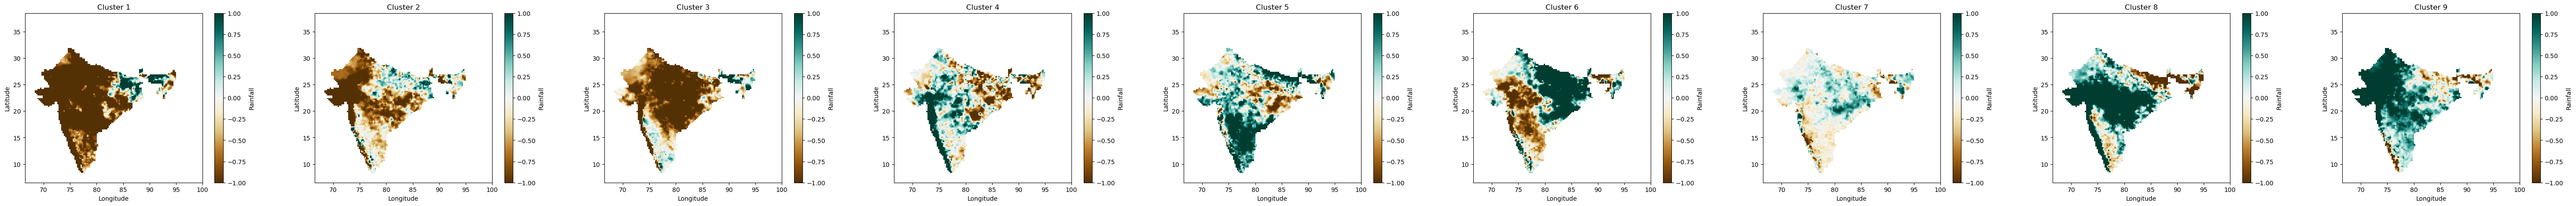

In [39]:
arr=[cluster1_fullMap,cluster2_fullMap,cluster3_fullMap,cluster4_fullMap,cluster5_fullMap,cluster6_fullMap,
    cluster7_fullMap,cluster8_fullMap,cluster9_fullMap]
PlotMap(arr)


In [25]:
#Accessing the zone files
zone1_predict=[]
zone2_predict=[]
zone3_predict=[]
zone4_predict=[]
zone5_predict=[]
zone6_predict=[]

#Accessing nc the datasets
path1=[]
path2=[]
path3=[]
path4=[]
path5=[]
path6=[]
path7=[]

#Storing the paths in a array
for i in range(2011,2023):
    path1.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 1\Zone1_Anomaly_{i}.nc")
    path2.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 2\Zone2_Anomaly_{i}.nc")
    path3.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 3\Zone3_Anomaly_{i}.nc")
    path4.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 4\Zone4_Anomaly_{i}.nc")
    path5.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 5\Zone5_Anomaly_{i}.nc")
    path6.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 6\Zone6_Anomaly_{i}.nc")
    
    
#Accessing all the datasets and storing all data in all_data list
for i in range(len(path1)):
    zone1_predict.append(xarray.open_dataset(path1[i]))
    zone2_predict.append(xarray.open_dataset(path2[i]))
    zone3_predict.append(xarray.open_dataset(path3[i]))
    zone4_predict.append(xarray.open_dataset(path4[i]))
    zone5_predict.append(xarray.open_dataset(path5[i]))
    zone6_predict.append(xarray.open_dataset(path6[i]))

In [26]:
predict_category=pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\Rain Category 2011-2022.csv",index_col=0)
predict_category

,zone1,zone2,zone3,zone4,zone5,zone6
0,6,4,5,3,4,5
1,4,4,5,3,4,4
2,5,4,4,4,5,5
3,4,3,4,4,3,4
4,4,3,4,4,3,2
5,4,4,4,4,4,4
6,4,3,4,5,3,4
7,4,4,4,4,4,4
8,5,4,5,4,5,6
9,5,4,6,5,4,5


In [27]:
predicted=km.predict(predict_category)

In [28]:
predicted

array([0, 4, 0, 6, 1, 3, 6, 3, 0, 4, 3, 8])

In [29]:
maps_of_predicts=[]
for i in range(len(zone1_predict)):
    maps_of_predicts.append(xarray.merge([zone1_predict[i], zone2_predict[i], zone3_predict[i], zone4_predict[i], zone5_predict[i], zone6_predict[i]]))
    

In [30]:
len(maps_of_predicts)

12

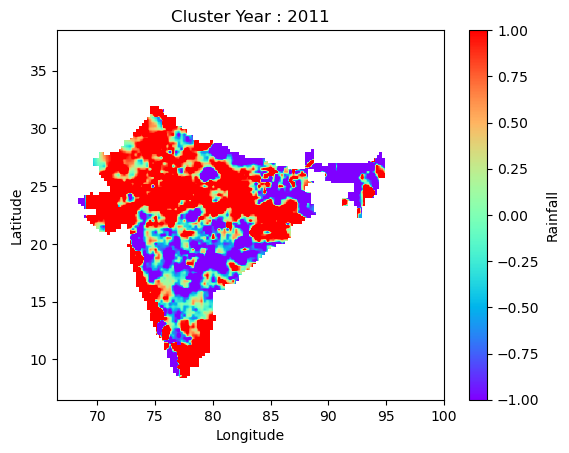

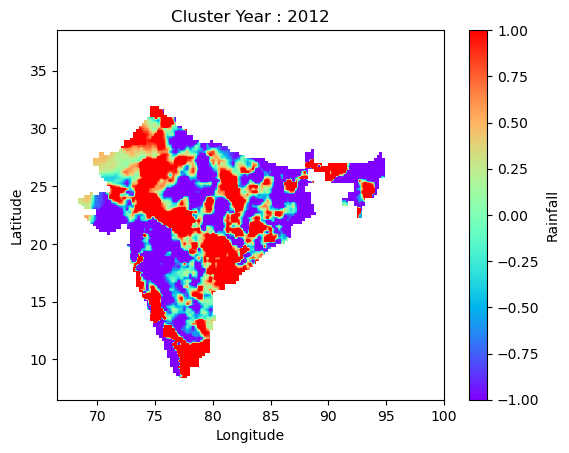

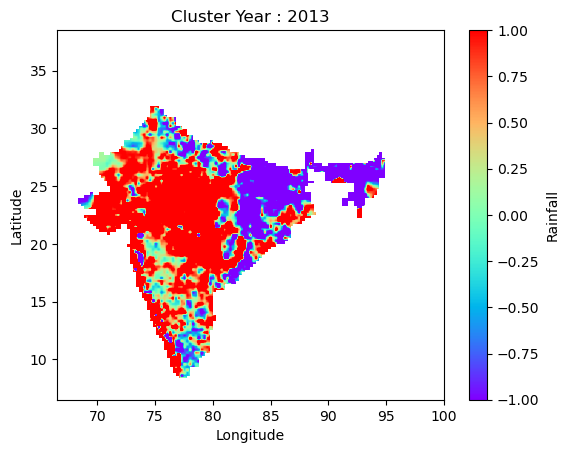

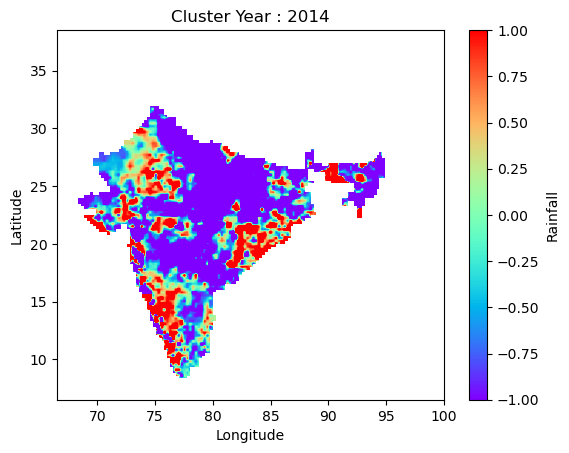

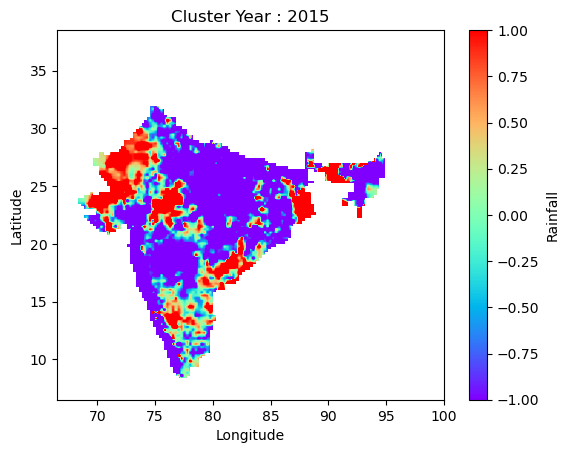

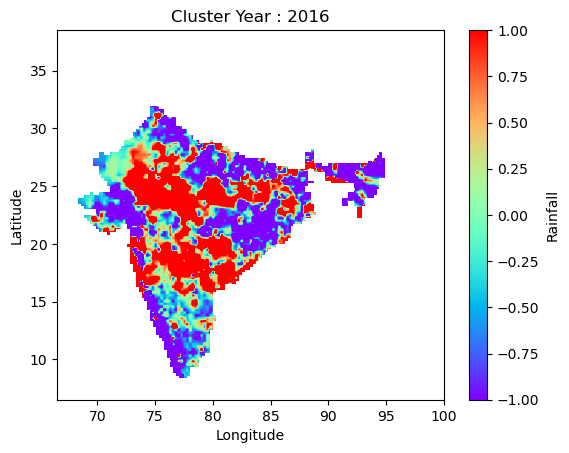

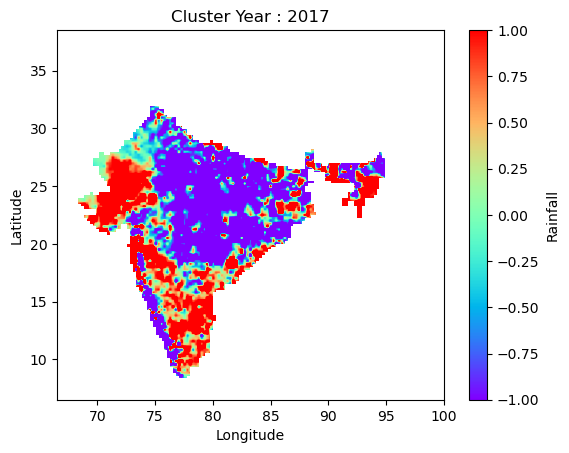

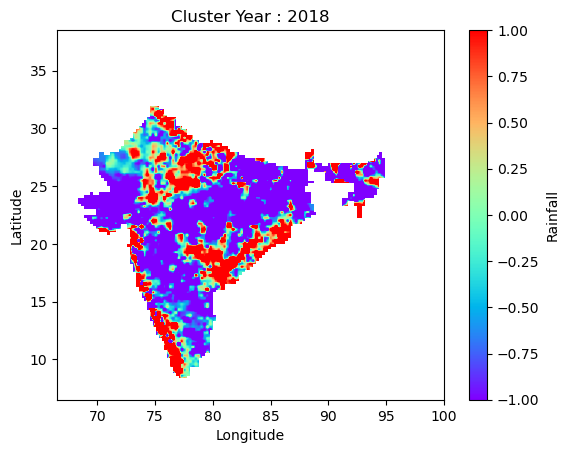

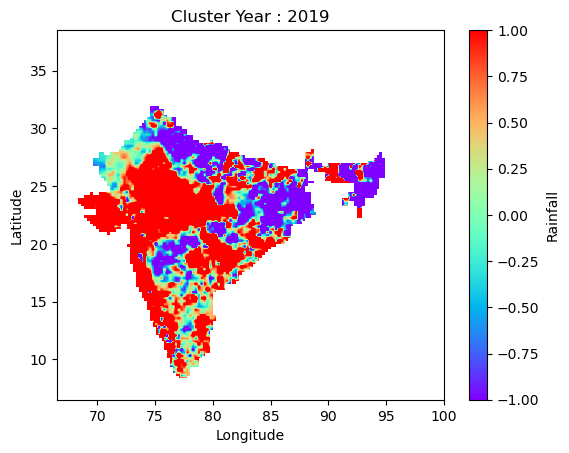

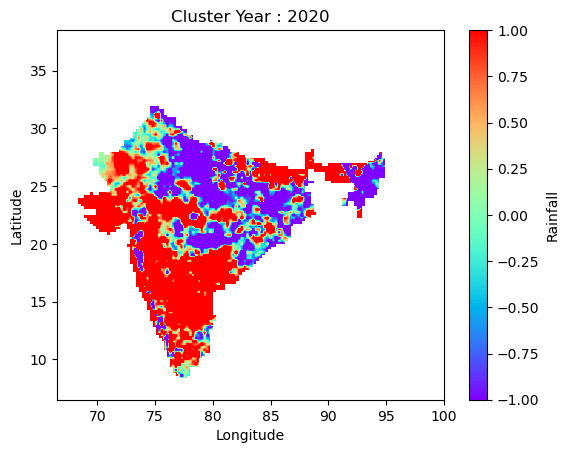

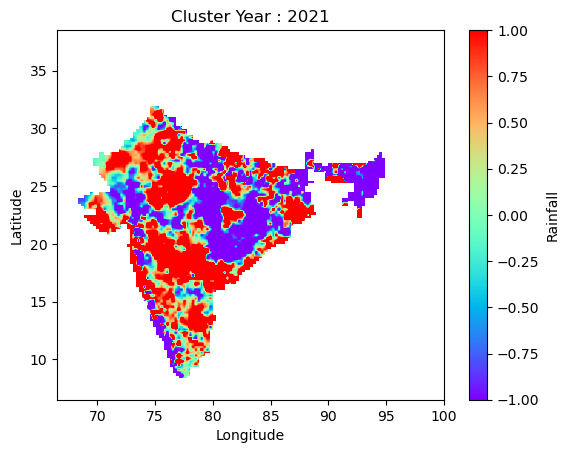

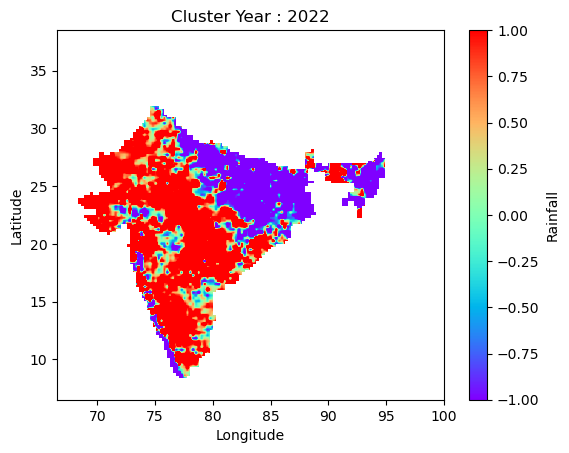

In [22]:
year=2011
for i in maps_of_predicts:
    PlotMap(i.to_array()[0],f"Year : {year}")
    year+=1

In [32]:
# df = pd.DataFrame(predicted, columns=(['Cluster Number']))
# df.to_csv('Cluster Number 2011-2022.csv')
# df

,Cluster Number
0,0
1,4
2,0
3,6
4,1
5,3
6,6
7,3
8,0
9,4


In [41]:
pip install MiniSom


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for MiniSom: filename=MiniSom-2.3.1-py3-none-any.whl size=10601 sha256=8a03572e0a7518948c977fcd61f73088c9e89042f87a85eb6eaf67a983373475
  Stored in directory: c:\users\ratho\appdata\local\pip\cache\wheels\c5\e6\c5\d9ee875bf0f731aa1f390b5edb5b84a40f7e30d07ca2e2ca76
Successfully built MiniSom
Note: you may need to restart the kernel to use updated packages.
